<a href="https://colab.research.google.com/github/devrihartle/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Module_4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [10]:

import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
### YOUR CODE HERE 

###1) What are the appropriate visualizations to answer the question "What was the typical fare paid for passage on the Titanic?"



You can do a historgram. 

###2) Create the visualizations you selected in 2).  

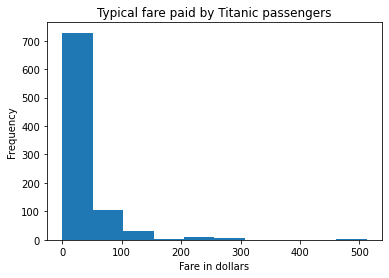

In [2]:
import matplotlib.pyplot as plt
plt.hist(Titanic['Fare'])
plt.xlabel('Fare in dollars')
plt.ylabel('Frequency')
plt.title('Typical fare paid by Titanic passengers')
plt.show()

###3) Describe your results in a sentence or two.

The results are positively skewed and seemingly unimodal, not symmetric. 

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

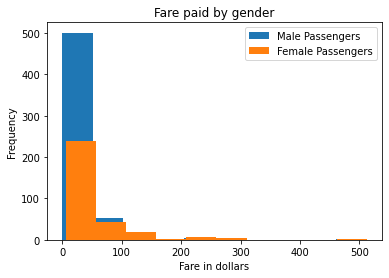

In [3]:
Titanic_Male = Titanic[Titanic['Sex']=='male']
Titanic_Female = Titanic[Titanic['Sex']=='female']

plt.hist(Titanic_Male['Fare'],label='Male Passengers')
plt.hist(Titanic_Female['Fare'],label='Female Passengers')

plt.xlabel('Fare in dollars')
plt.ylabel('Frequency')
plt.title('Fare paid by gender')
plt.legend(loc='upper right')
plt.show()

###5) Describe the difference in distribution of fare paid between male and female passengers.

The distributions are actually relatively the same, there were just more male passengers than female passengers. 

###6) Make a bar plot to show the frequency of individuals in each passenger class.

col_0   count
Pclass       
1         216
2         184
3         487


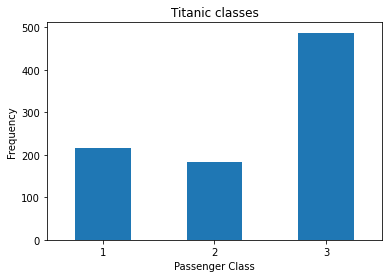

In [6]:
### YOUR CODE HERE 
#print(pd.crosstab(index=Titanic['Pclass'], columns='count'))
df = pd.DataFrame({'lab': ['1', '2', '3'], 'val': [216,184,487]})
ax = df.plot.bar(x='lab', y='val', rot = 0)
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title('Titanic classes')
ax.get_legend().remove()
plt.show()

###7) Summarize your results from 6)

Most of the passengers were in the 3rd class, almost 500 passengers and the least amount of passengers were in the 2nd class. 

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

col_0                    count
Parents/Children_Aboard       
0                          674
1                          118
2                           80
3                            5
4                            4
5                            5
6                            1


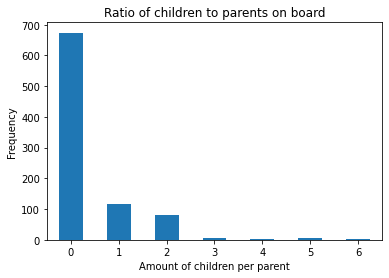

In [9]:
### YOUR CODE HERE 
print(pd.crosstab(index=Titanic['Parents/Children_Aboard'], columns='count'))
df = pd.DataFrame({'lab': ['0','1', '2', '3', '4', '5', '6'], 'val': [674,118,80,5,4,5,1]})
ax = df.plot.bar(x='lab', y='val', rot = 0)
plt.xlabel('Amount of children per parent')
plt.ylabel('Frequency')
plt.title('Ratio of children to parents on board')
ax.get_legend().remove()
plt.show()

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

The large majority of passengers traveled alone. There were very few passengers who actually traveled with children, relatively. 

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [14]:
### YOUR CODE HERE 
Titanic.loc[Titanic['Age'] >= 18, 'Adult_or_child'] = 1
Titanic.loc[Titanic['Age'] > 18, 'Adult_or_child'] = 0
Titanic['Adult_or_child']

#child = Titanic[Titanic['Age'] < 18]
#adult = Titanic[Titanic['Age'] >= 18]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
882    0.0
883    0.0
884    NaN
885    0.0
886    0.0
Name: Adult_or_child, Length: 887, dtype: float64

###11) Make a cross-tab of survival by age (child vs adult).

In [22]:
### YOUR CODE HERE 
print(pd.crosstab(Titanic['Survived'], Titanic['Adult_or_child']))

Adult_or_child  0.0  1.0
Survived                
0               457   23
1               264   13


###12) Create a new data frame to hold the data for the figure.

In [24]:
### YOUR CODE HERE 
new_df=pd.DataFrame({'Adult': [457,264], 'Child': [23,13]})
new_df.head()

,Adult,Child
0,457,23
1,264,13


###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

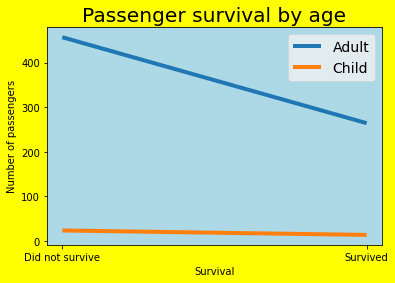

In [28]:
### YOUR CODE HERE 
#new_df['Adult'].plot()
#new_df['Child'].plot()
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
fig.set_facecolor('yellow')
my_ticks = ['Did not survive', 'Survived']
ax.plot(my_ticks, new_df['Adult'],label ='Adult')
ax.plot(my_ticks, new_df['Child'],label ='Child')
ax.set_facecolor('lightblue')
ax.set_title('Passenger survival by age')
ax.set_xlabel('Survival')
ax.set_ylabel('Number of passengers')
ax.legend()

###14) Summarize your results about passenger survival by age.

There were very few children on board, and of those children more died than survived. There were many more adults, but same as the children, more adults died than survived. 

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)